In [1]:
from continous_data_classification import event_detection
from continous_data_classification import plot_detection_results
from zenodo_get import zenodo_get
from obspy.clients.fdsn import Client
client = Client('IRIS')
import obspy
import pandas as pd
from joblib import dump, load
import os

## Downloading the model and scaler parameters


Now we are downloading the trained model and scaler parameters files stored remotely on a Zenodo repository. 
We are downloading three trained random forest models and corresponding scaler parameter files. 

The nomenclature of the model is as follows - P_before_after_F_lowcut_highcut_new sampling rate
So for example if the file is named as P_10_30_F_1_15_50, that means that the model is trained on the waveforms that start 10s before the first arrival and 30 



Description
This dataset contains three trained  random forest models named as following - 

- P_10_100_F_05_15_50.joblib - This is a model trained on 110s long waveforms (origin time - 10, origin time +100) in case of earthquakes and explosions and (first arrival pick -10, first arrival pick + 100) in case of surface events, the waveforms are tapered using 10% cosine taper, bandpass filtered between 0.5-15 Hz using Butterworth four corner filter, normalized and resampled to 50 Hz. 
- P_50_100_F_05_15_50.joblib 
- P_10_30_F_05_15_50.joblib. 


And also the standard scaler parameters for each features that will be used to normalize them. 

In [2]:
doi = '10.5281/zenodo.13328865'
files = zenodo_get([doi])

Title: Trained Random Forest Model and Scaler Parameters for (Phy+Man), 15 August, 2024
Keywords: 
Publication date: 2024-08-15
DOI: 10.5281/zenodo.13328865
Total size: 619.2 MB

Link: https://zenodo.org/record/13328865/files/best_rf_model_all_features_phy_man_P_50_100_F_05_15_50.joblib   size: 30.9 MB

Checksum is correct. (a668f2b4b2b1b763d67eaf49889b7b4f)

Link: https://zenodo.org/record/13328865/files/best_rf_model_all_features_phy_man_P_10_30_F_05_15_50.joblib   size: 191.0 MB

Checksum is correct. (7398572baf267d603e53e0203340cc8f)

Link: https://zenodo.org/record/13328865/files/scaler_params_phy_man_P_10_30_F_05_15_50.csv   size: 0.0 MB

Checksum is correct. (cb4201470bac8fc1a7c19a20775ef95c)

Link: https://zenodo.org/record/13328865/files/scaler_params_phy_man_P_10_100_F_05_15_50.csv   size: 0.0 MB

Checksum is correct. (5978efd4b65ea406248f2bbb5db66e2f)

Link: https://zenodo.org/record/13328865/files/best_rf_model_all_features_phy_man_P_10_100_F_05_15_50.joblib   size: 196.8 M

# Specify model

## The four models downloaded above were all trained on (Physical+Manual) features extracted from (0.5-15 Hz) waveforms, with varying durations of 40s, 110s, and 150s. Additionally, there's a model trained exclusively on the top 20 most important features. To use a specific model, simply uncomment the corresponding line in the following cell.**

In [3]:
## Parameters to set before running this script. 

## For 150s model (default)
#filename = 'P_50_100_F_05_15_50'


## For 110s model, uncomment this 
#filename = 'P_10_100_F_05_15_50'

## For 40s model, uncomment this - 
filename = 'P_10_30_F_05_15_50'

In [4]:
def infer_info(filename):
    highcut = highcut = int(filename.split('_')[5]) # higher limit of bandpass
    win = int(filename.split('_')[1]) + int(filename.split('_')[2])
    new_sr = new_sr = int(filename.split('_')[-1])
    
    return highcut, win, new_sr

## User Defined Parameters for specific case. 


## Note the option of Top_20, make this true if you'd like to use only top 20 most important features

In [5]:
## stride (s)
stride = 10


before = 0 
starttime = obspy.UTCDateTime(2024, 8, 15, 17, 39, 52) - before
dur = 300


stations_id = ['CC.WOW', 'CC.TAVI',  'CC.GNOB', 'CC.ARAT', 'CC.TABR', 'UW.RER']
location = '*'



top_20 = False

## Run the following cell (No modification is needed)

## Testing the 40s model

100%|██████████| 31/31 [00:00<00:00, 151719.28it/s]

100%|██████████| 31/31 [00:00<00:00, 451470.22it/s]

1 Trace(s) in Stream:
CC.WOW..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 143040.07it/s]

100%|██████████| 31/31 [00:00<00:00, 433411.41it/s]

1 Trace(s) in Stream:
CC.TAVI..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 358191.25it/s]

100%|██████████| 31/31 [00:00<00:00, 190650.18it/s]

1 Trace(s) in Stream:
CC.GNOB..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 383549.92it/s]

100%|██████████| 31/31 [00:00<00:00, 442256.54it/s]

1 Trace(s) in Stream:
CC.ARAT..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 167988.92it/s]

100%|██████████| 31/31 [00:00<00:00, 437789.31it/s]

1 Trace(s) in Stream:
CC.TABR..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 164795.21it/s]

100%|██████████| 31/31 [00:00<00:00, 193487.24it/s]

1 Trace(s) in Stream:
UW.RER..HHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 100.0 Hz, 30001 samples



100%|██████████| 6/6 [00:18<00:00,  3.12s/it]


27


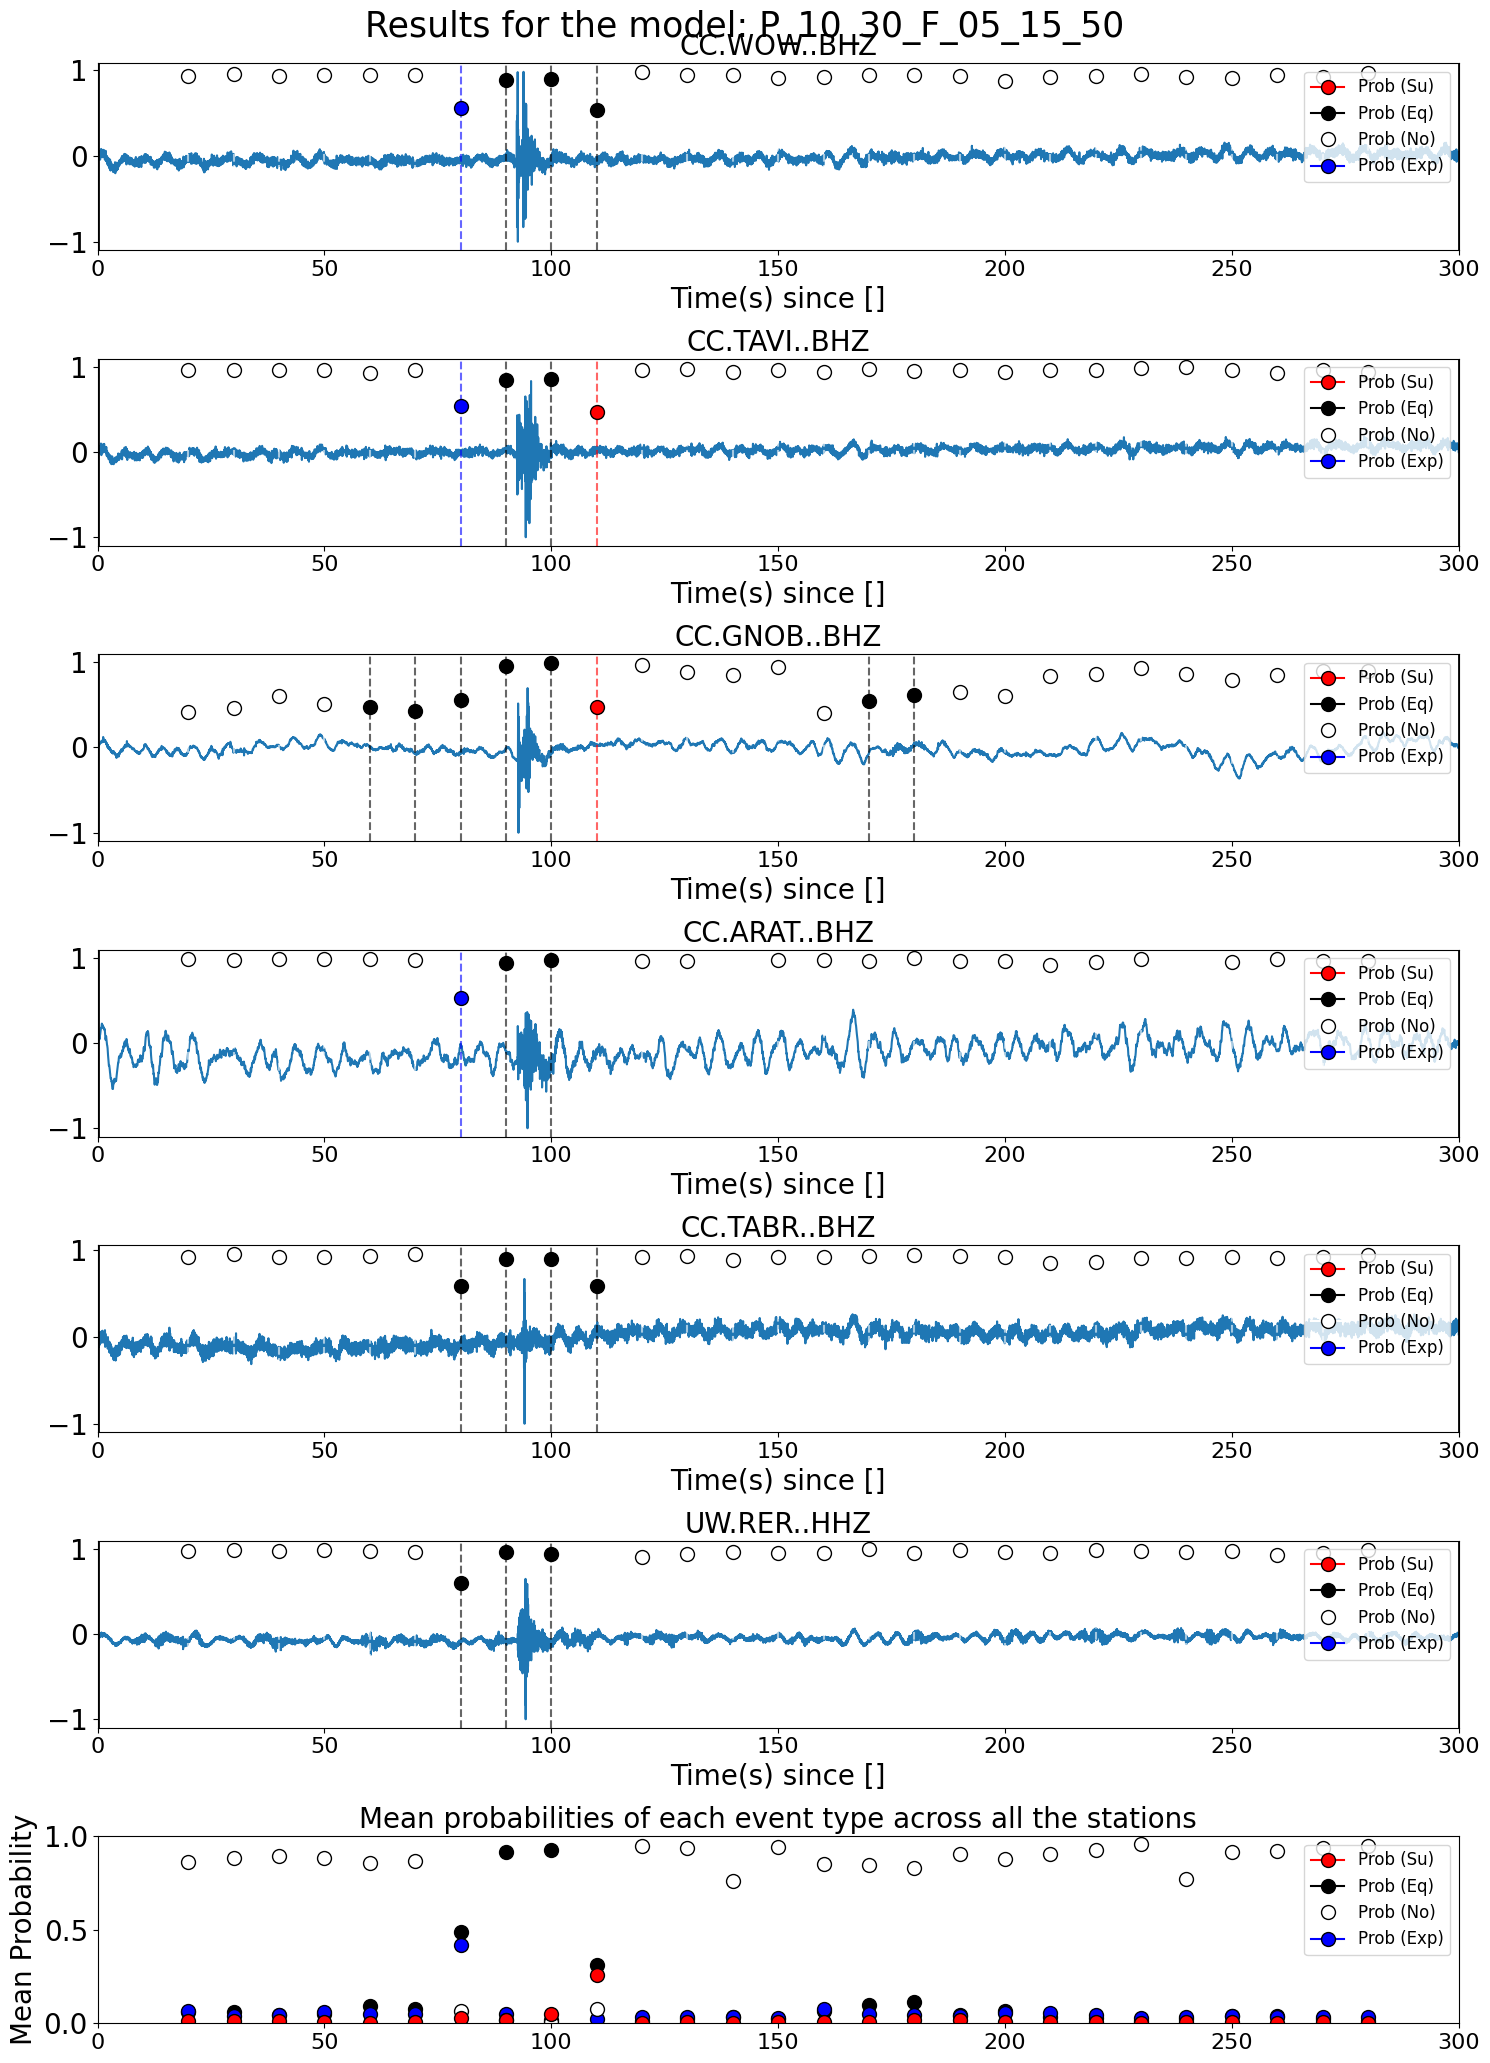

In [6]:
filename = 'P_10_30_F_05_15_50'
highcut, win, new_sr = infer_info(filename)
original_sr = 100
lowcut = 0.5
num_corners = 4
samp_freq = 100

result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times  = event_detection(starttime = starttime, stations_id = stations_id, dur = dur, stride = stride, new_sr = new_sr, 
                           original_sr = original_sr, low = lowcut, high = highcut, num_corners = num_corners, location = location, samp_freq = samp_freq, win = win, filename = filename, top_20 = top_20)




plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, 
                       prob_stns = prob_stns, xlim = [0,dur], ev_markers = [before,dur], shift = stride, win = win, filename = filename)

## Testing the 40s model but with top 20 features

100%|██████████| 31/31 [00:00<00:00, 154238.94it/s]

100%|██████████| 31/31 [00:00<00:00, 418081.75it/s]

1 Trace(s) in Stream:
CC.WOW..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 162732.70it/s]

100%|██████████| 31/31 [00:00<00:00, 422153.97it/s]

1 Trace(s) in Stream:
CC.TAVI..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 66610.36it/s]

100%|██████████| 31/31 [00:00<00:00, 368338.31it/s]

1 Trace(s) in Stream:
CC.GNOB..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 395207.98it/s]

100%|██████████| 31/31 [00:00<00:00, 412772.77it/s]

1 Trace(s) in Stream:
CC.ARAT..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 314066.24it/s]

100%|██████████| 31/31 [00:00<00:00, 412772.77it/s]

1 Trace(s) in Stream:
CC.TABR..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 374707.27it/s]

100%|██████████| 31/31 [00:00<00:00, 410168.53it/s]

1 Trace(s) in Stream:
UW.RER..HHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 100.0 Hz, 30001 samples



100%|██████████| 6/6 [00:16<00:00,  2.74s/it]


27


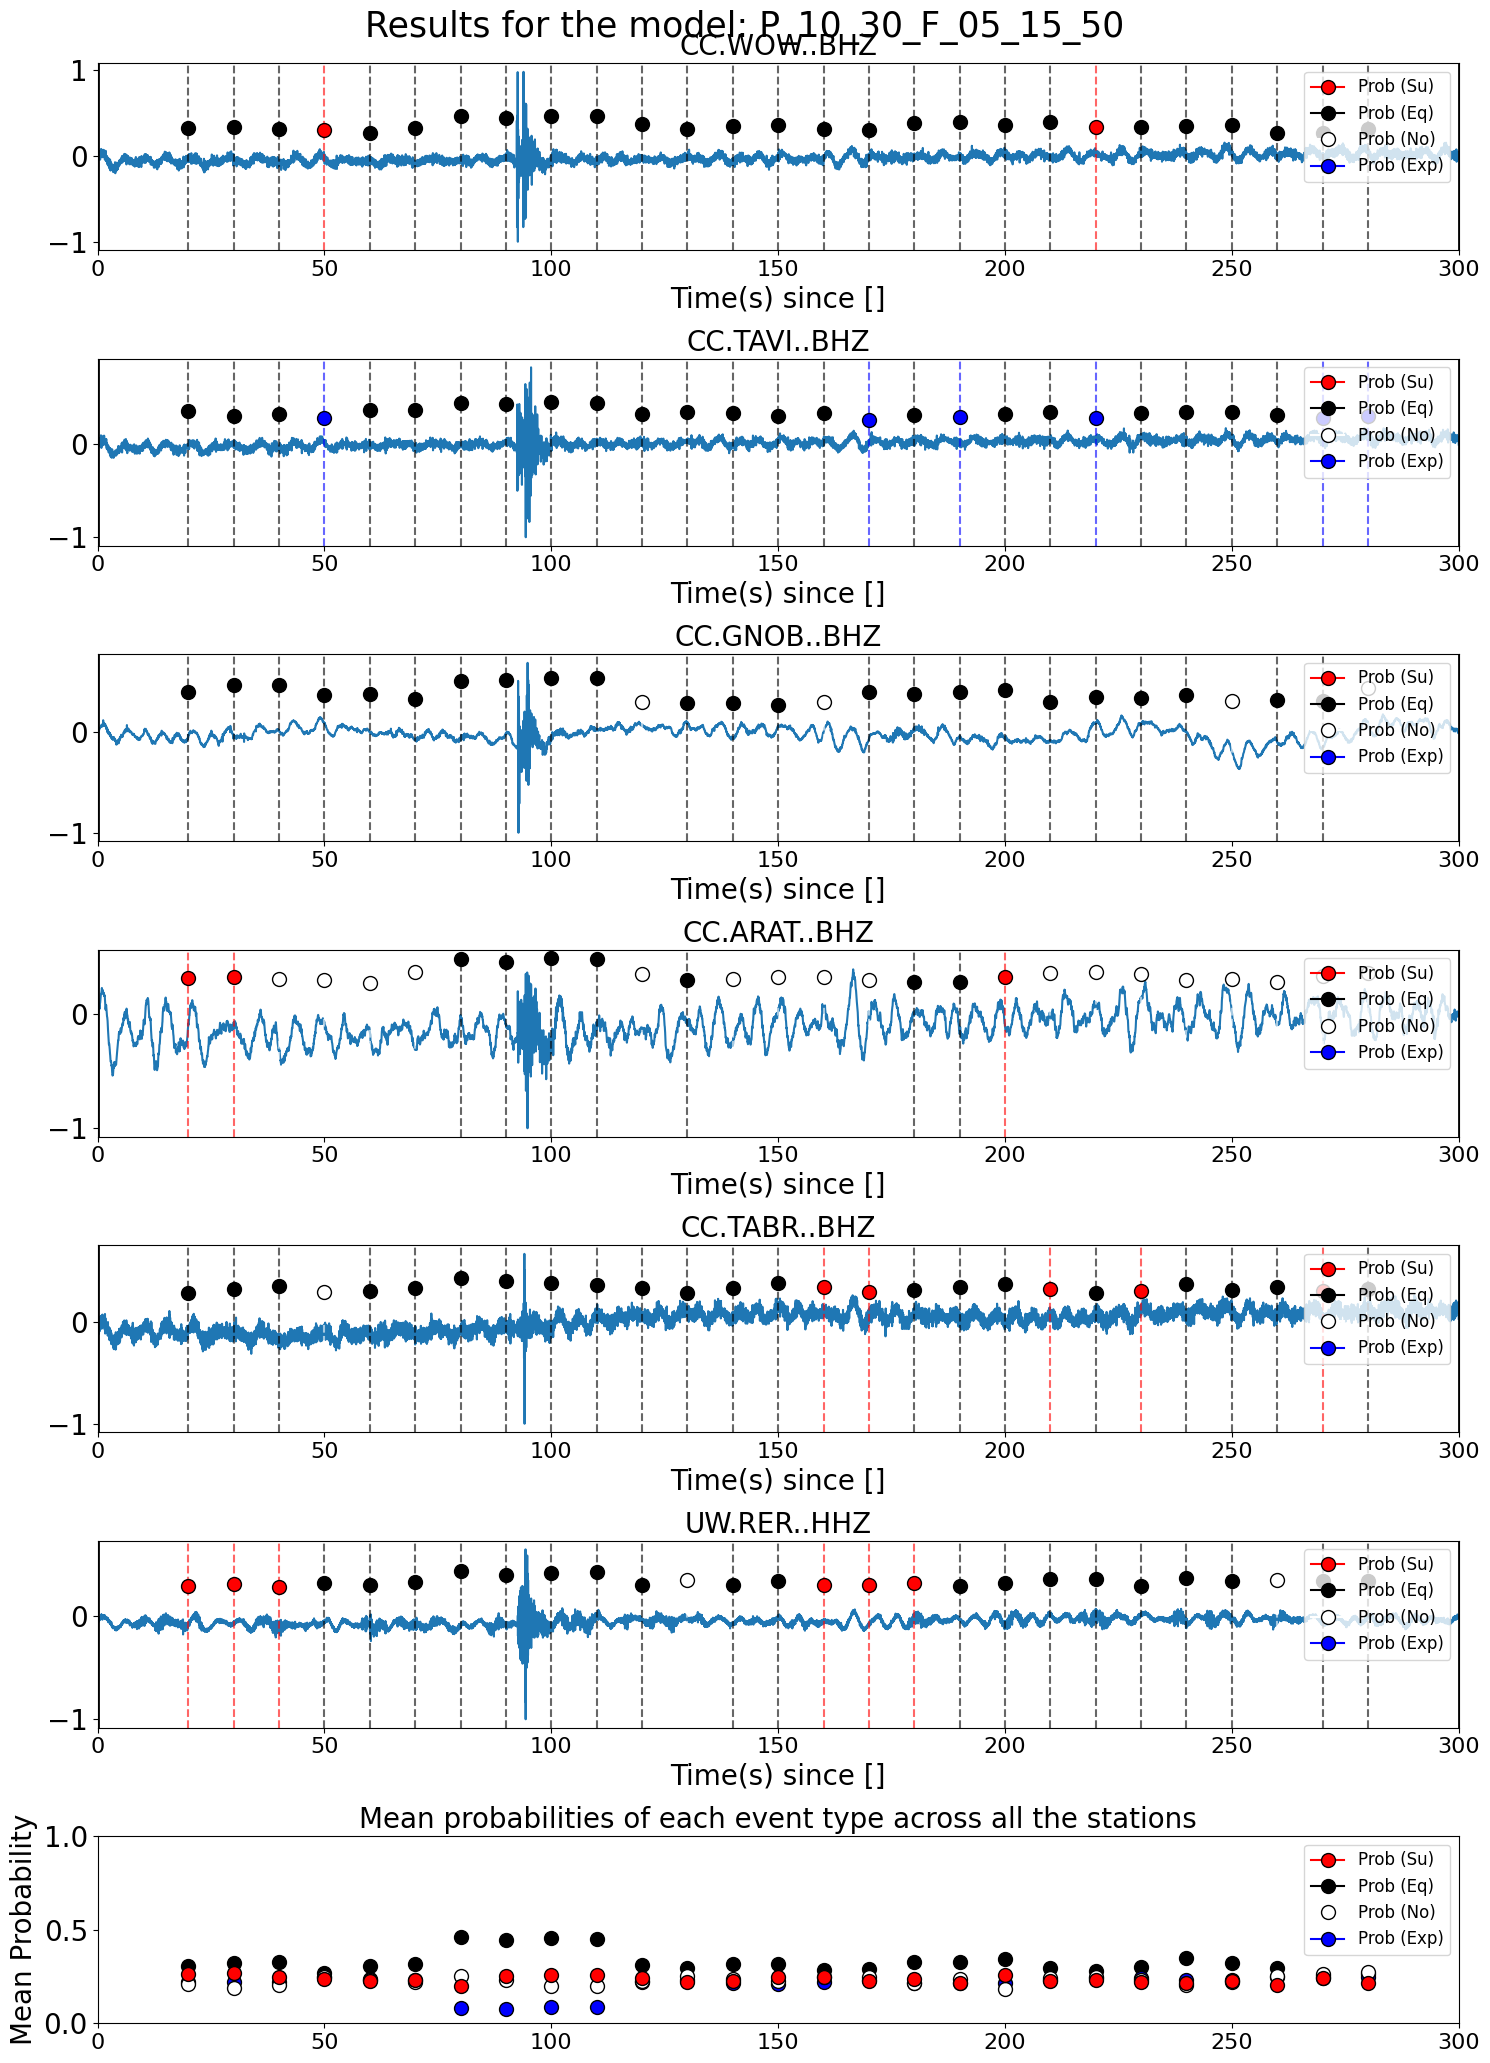

In [7]:
filename = 'P_10_30_F_05_15_50'
highcut, win, new_sr = infer_info(filename)
original_sr = 100
lowcut = 0.5
num_corners = 4
samp_freq = 100

top_20 = True

result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times  = event_detection(starttime = starttime, stations_id = stations_id, dur = dur, stride = stride, new_sr = new_sr, 
                           original_sr = original_sr, low = lowcut, high = highcut, num_corners = num_corners, location = location, samp_freq = samp_freq, win = win, filename = filename, top_20 = top_20)




plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, 
                       prob_stns = prob_stns, xlim = [0,dur], ev_markers = [before,dur], shift = stride, win = win, filename = filename)

## Testing the 110s model

100%|██████████| 31/31 [00:00<00:00, 376879.49it/s]

100%|██████████| 31/31 [00:00<00:00, 457828.96it/s]

1 Trace(s) in Stream:
CC.WOW..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 159147.40it/s]

100%|██████████| 31/31 [00:00<00:00, 440757.37it/s]

1 Trace(s) in Stream:
CC.TAVI..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 379077.04it/s]

100%|██████████| 31/31 [00:00<00:00, 430541.14it/s]

1 Trace(s) in Stream:
CC.GNOB..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 381300.36it/s]

100%|██████████| 31/31 [00:00<00:00, 431971.51it/s]

1 Trace(s) in Stream:
CC.ARAT..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 403799.45it/s]

100%|██████████| 31/31 [00:00<00:00, 451470.22it/s]

1 Trace(s) in Stream:
CC.TABR..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 357207.21it/s]

100%|██████████| 31/31 [00:00<00:00, 442256.54it/s]

1 Trace(s) in Stream:
UW.RER..HHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 100.0 Hz, 30001 samples



100%|██████████| 6/6 [00:15<00:00,  2.55s/it]


20


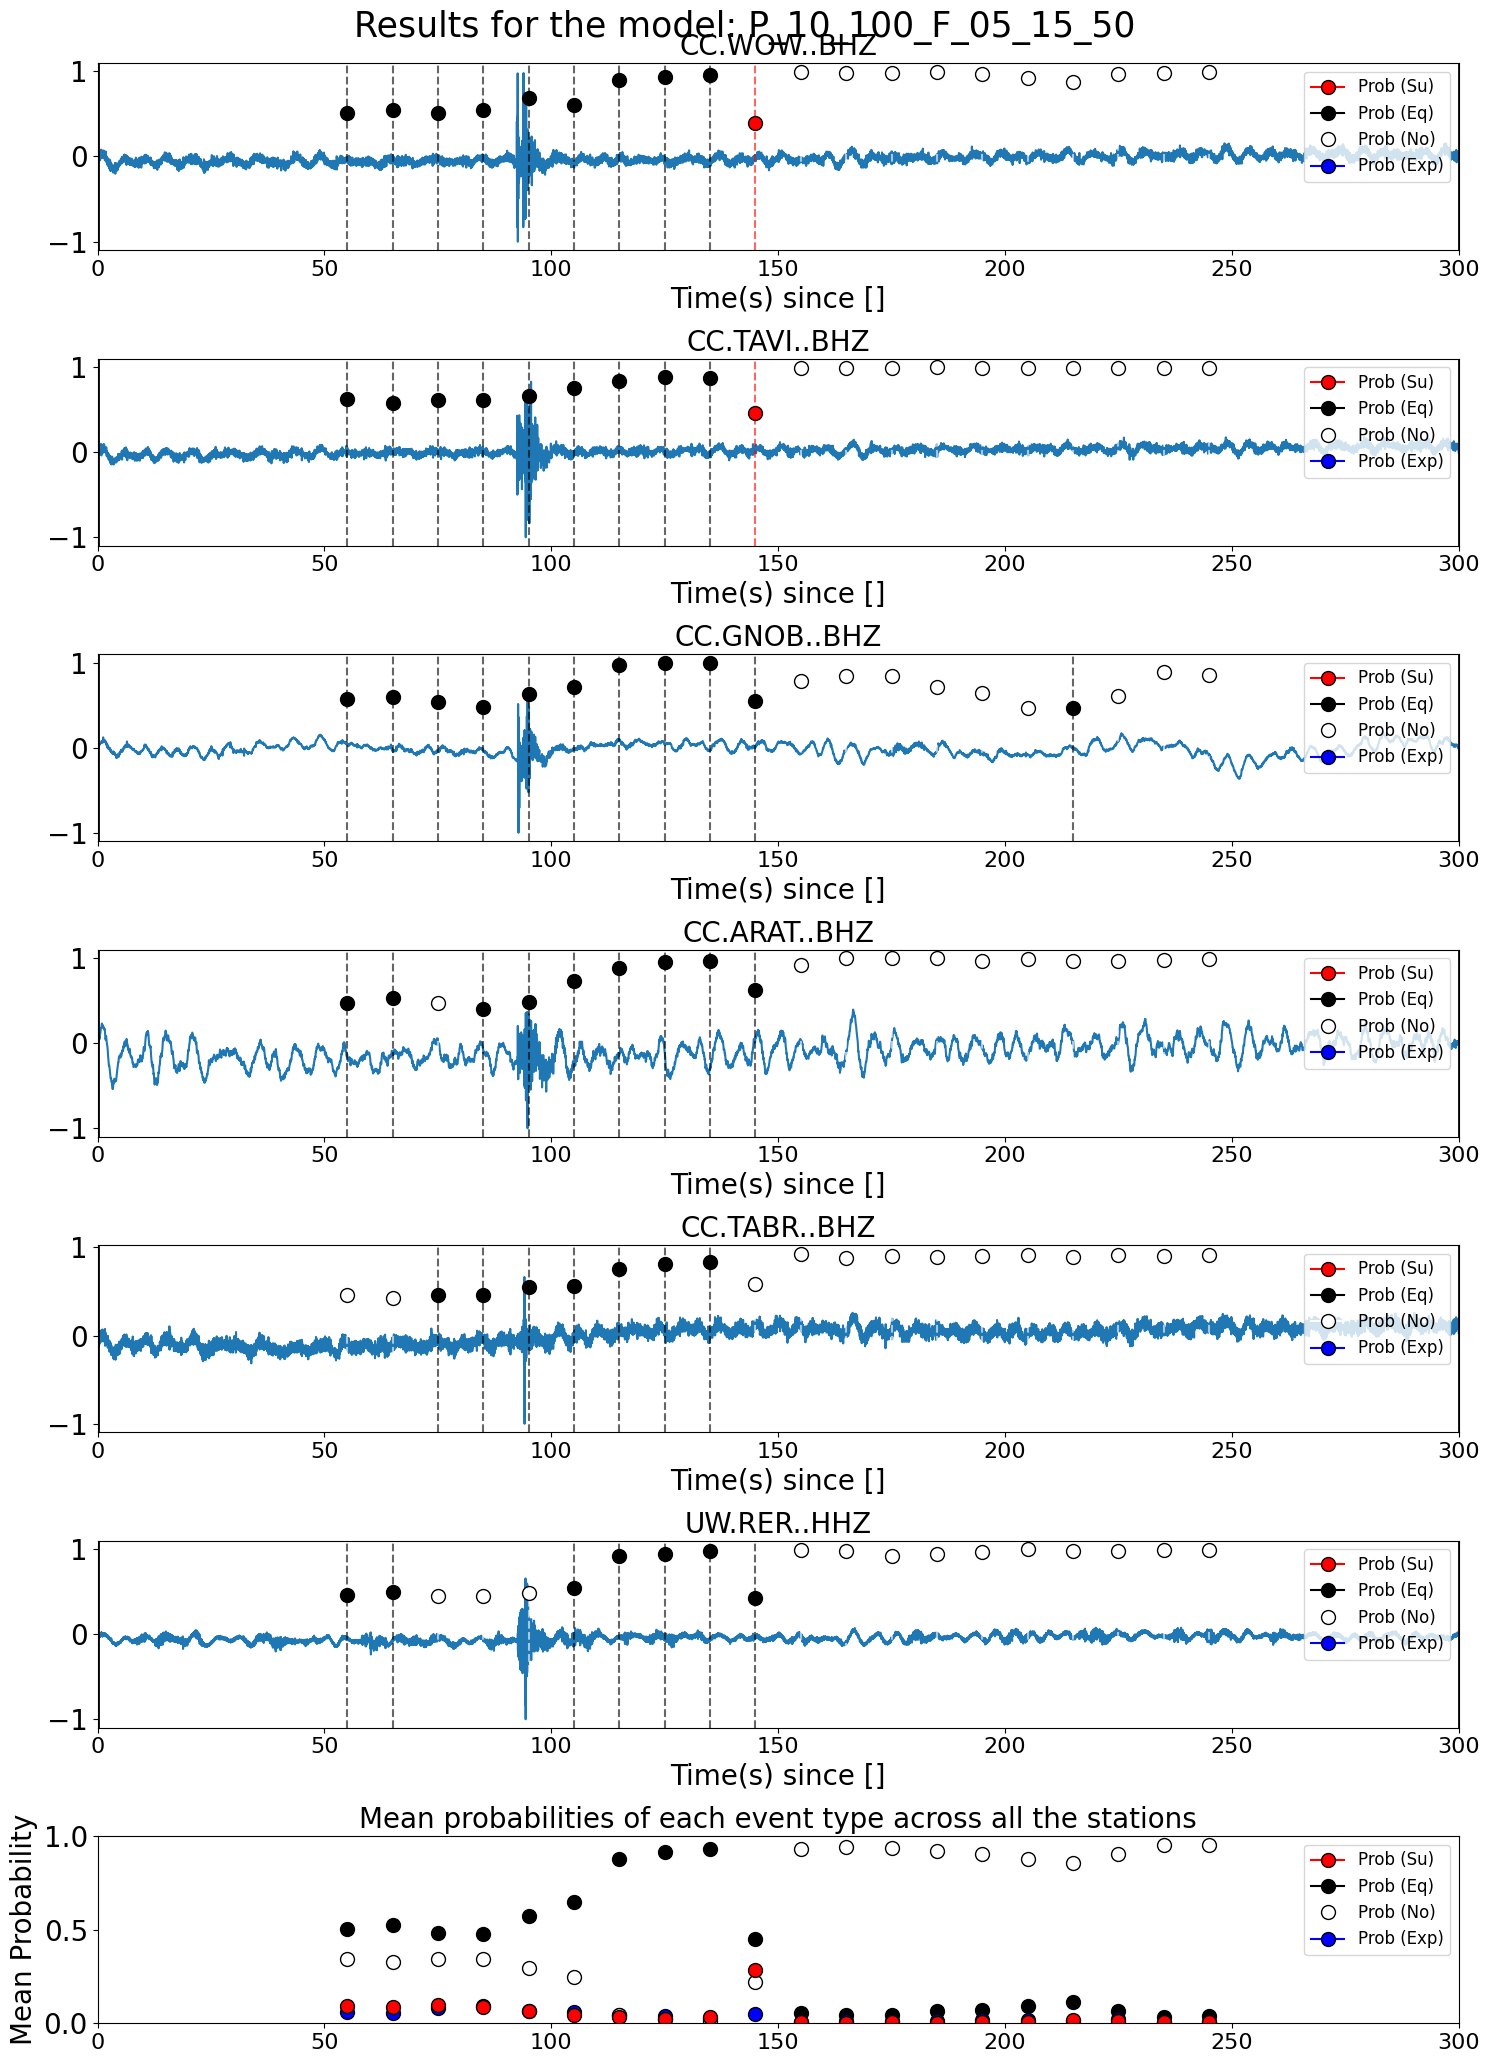

In [9]:
filename = 'P_10_100_F_05_15_50'
highcut, win, new_sr = infer_info(filename)
original_sr = 100
lowcut = 0.5
num_corners = 4
samp_freq = 100
top_20 = False

result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times  = event_detection(starttime = starttime, stations_id = stations_id, dur = dur, stride = stride, new_sr = new_sr, 
                           original_sr = original_sr, low = lowcut, high = highcut, num_corners = num_corners, location = location, samp_freq = samp_freq, win = win, filename = filename, top_20 = top_20)




plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, 
                       prob_stns = prob_stns, xlim = [0,dur], ev_markers = [before,dur], shift = stride, win = win, filename = filename)

## Testing the 150s model

100%|██████████| 31/31 [00:00<00:00, 374707.27it/s]

100%|██████████| 31/31 [00:00<00:00, 459446.73it/s]

1 Trace(s) in Stream:
CC.WOW..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 422153.97it/s]

100%|██████████| 31/31 [00:00<00:00, 451470.22it/s]

1 Trace(s) in Stream:
CC.TAVI..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 374707.27it/s]

100%|██████████| 31/31 [00:00<00:00, 443765.95it/s]

1 Trace(s) in Stream:
CC.GNOB..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 310318.43it/s]

100%|██████████| 31/31 [00:00<00:00, 439268.32it/s]

1 Trace(s) in Stream:
CC.ARAT..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 381300.36it/s]

100%|██████████| 31/31 [00:00<00:00, 443765.95it/s]

1 Trace(s) in Stream:
CC.TABR..BHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 50.0 Hz, 15001 samples



100%|██████████| 31/31 [00:00<00:00, 352367.00it/s]

100%|██████████| 31/31 [00:00<00:00, 429120.21it/s]

1 Trace(s) in Stream:
UW.RER..HHZ | 2024-08-15T17:39:52.000000Z - 2024-08-15T17:44:52.000000Z | 100.0 Hz, 30001 samples



100%|██████████| 6/6 [00:09<00:00,  1.55s/it]


16


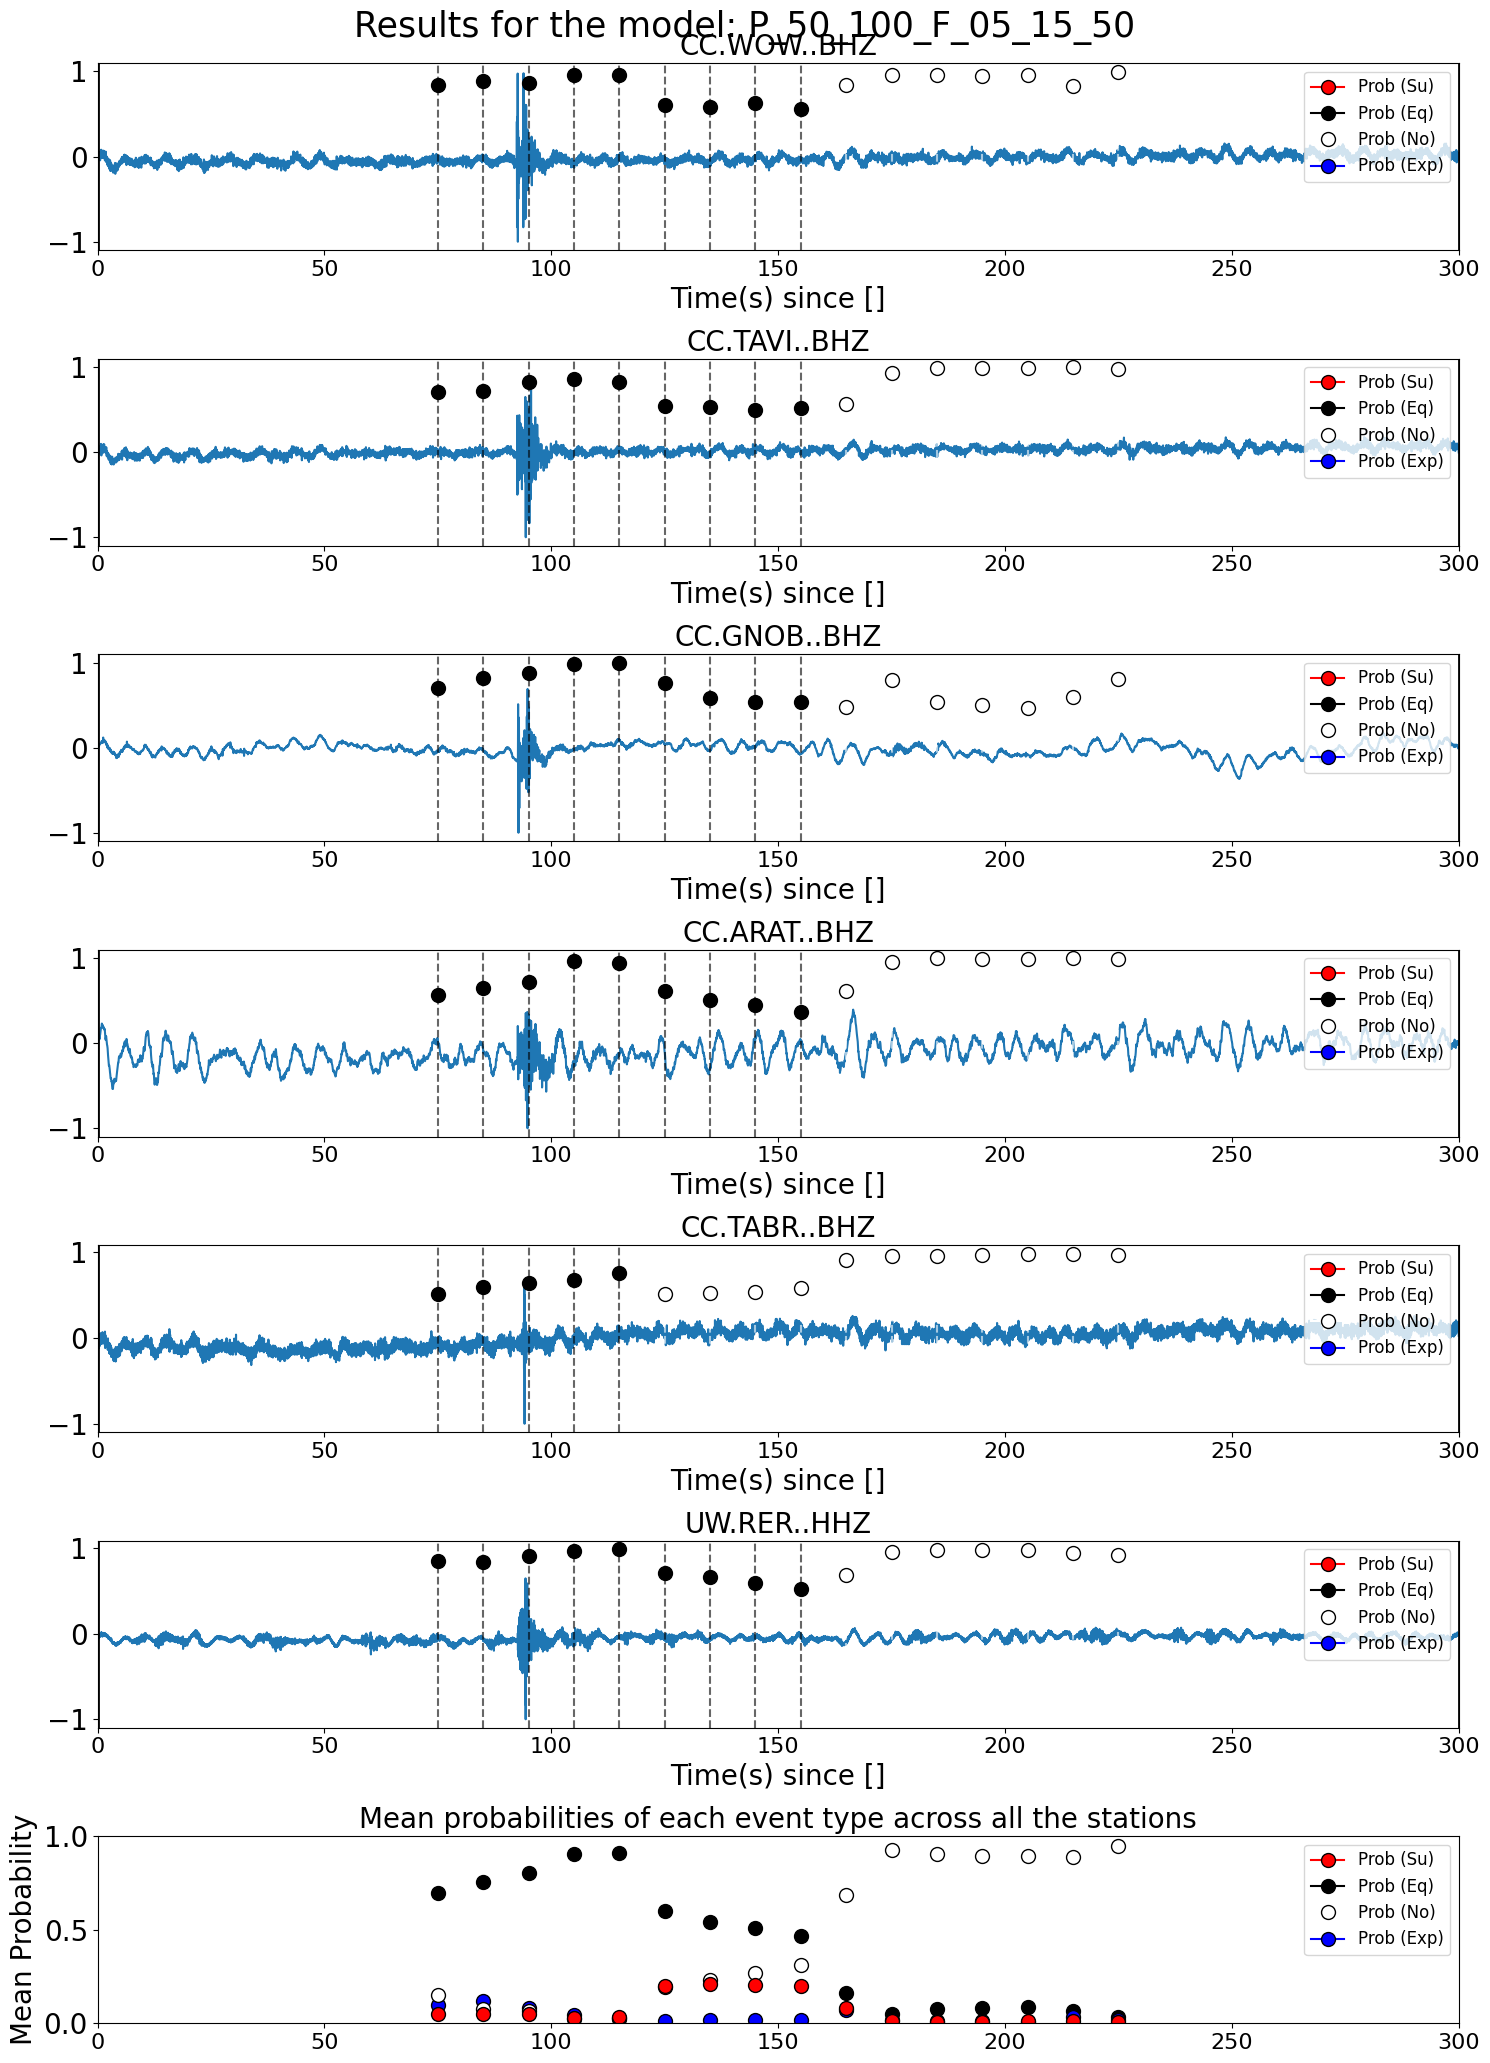

In [11]:
filename = 'P_50_100_F_05_15_50'
highcut, win, new_sr = infer_info(filename)
original_sr = 100
lowcut = 0.5
num_corners = 4
samp_freq = 100
top_20 = False

result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times  = event_detection(starttime = starttime, stations_id = stations_id, dur = dur, stride = stride, new_sr = new_sr, 
                           original_sr = original_sr, low = lowcut, high = highcut, num_corners = num_corners, location = location, samp_freq = samp_freq, win = win, filename = filename, top_20 = top_20)




plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, 
                       prob_stns = prob_stns, xlim = [0,dur], ev_markers = [before,dur], shift = stride, win = win, filename = filename)

## Deleting the large downloaded files 
so we can push to github repository.


In [12]:
# Get the current working directory
directory = os.getcwd()

# List the files in the directory
files = os.listdir(directory)

# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".joblib"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)
        
# Iterate over the files and delete CSV files
for file in files:
    if file.endswith(".csv"):
        file_path = os.path.join(directory, file)
        os.remove(file_path)